---
# Final Project
## CS181/DA210: Data Systems
### **Submitted To:** *Dr. Tanya Amert*
### **Submitted By:** *Suryansh Agrawal*
#### *17th April 2022*
---

### **Since the start of 2019, I have been interested in finaces and specially intrigued with the concept of Crypto and decentralization. I started investing in 2020, and I wanted to set a comparison between my most invested cryptos and stocks respectively.**

To dot this, I chose all the four different websites to extract all my data to have a better practice of webscrapping.

- **Cryptocurrency**
    1. <u><a href="" target="_blank">BTC Price</a></u> : The data on the website was in a tabular form. The exciting part of this was that the default of the URL and html opens to just a one month data which was not desirable, but there are multiple buttons that can change the data on the website. To my surprise, when I tried to save the page source after changing using those buttons to customzie my data, it would save the default html. Dr. Amert and I were then able to find a trick to use the buttons and look for the appropriate data, and the **COPY** the html for our use. It then worked as desired. 
    2. <u><a href="" target="_blank">ETH Price</a></u> : Even for this data, the website had tabular data and I came across the similar situation in this website as well. I did the same thing. When I tried to copy the HTML, it was very badly formatted and for me to webscrape the data, I needed a better formatted html/xml. To do this I used the  <a href="https://www.freeformatter.com/html-formatter.html" target="_blank">HTML Formatter</a>.


- **Stock**
    3. <u><a href="" target="_blank">MSFT Price</a></u> : Data was tabular (same isssues and solution as described above)
    4. <u><a href="" target="_blank">FB Price</a></u> : Data was tabular (same isssues and solution as described above)

In [1]:
# Importing all the necessary libraries

import os
import io
import sys
import importlib
import datetime
import os.path
import json
import requests
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy as sa
from lxml import etree

module_dir = "."
module_path = os.path.abspath(module_dir)
if not module_path in sys.path:
    sys.path.append(module_path)

htmlparser =  etree.HTMLParser()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import util
importlib.reload(util)

<module 'util' from '/Users/suryansh/Dropbox (HIP Investor)/Mac/Desktop/CS181/cs181-s22-repo/CS Final Project/util.py'>

**Using the downloaded HTML of Bitcoin (BTC), making a parser so that we can extract the tabular data from the web page using XPATH.**

In [2]:
# btc parser

from lxml import etree
import os.path

datadir = "publicdata"

btc_path = os.path.join(datadir, "BTC.xml")
parser = etree.HTMLParser(remove_blank_text=True)
tree = etree.parse(btc_path, parser)

btc_root = tree.getroot()

**Using the downloaded HTML of Ethereum (ETH), making a parser so that we can extract the tabular data from the web page using XPATH.**

In [3]:
#eth parser

from lxml import etree
import os.path

datadir = "publicdata"

eth_path = os.path.join(datadir, "ETH.xml")
parser = etree.HTMLParser(remove_blank_text=True)
tree = etree.parse(eth_path, parser)

eth_root = tree.getroot()

**Using the downloaded HTML of Microsoft Corporation (MSFT), making a parser so that we can extract the tabular data from the web page using XPATH.**

In [4]:
# msft parser

from lxml import etree
import os.path

datadir = "publicdata"

msft_path = os.path.join(datadir, "MSFT.xml")
parser = etree.HTMLParser(remove_blank_text=True)
tree = etree.parse(msft_path, parser)

msft_root = tree.getroot()

**Using the downloaded HTML of Meta Platforms Inc. (FB), making a parser so that we can extract the tabular data from the web page using XPATH.**

In [5]:
# fb parser

from lxml import etree
import os.path

datadir = "publicdata"

fb_path = os.path.join(datadir, "FB.xml")
parser = etree.HTMLParser(remove_blank_text=True)
tree = etree.parse(fb_path, parser)

fb_root = tree.getroot()

Now, using XPATH, we will extract the tables and all the necesarry columns for our Bitcoin database

In [6]:
def btc_scrape(root):
    
    """
    Inputs :
    root : takes the root of the parser 
    
    Converts webscrapes the btc root's using xpath and converts the webscrapped table to a well organized and formatted DataFrame
    
    Return Value : DataFrame
    """
    
    header_list = root.xpath("//th/text()")

    date_list = root.xpath("//tr/td[position() = 1]/text()")       # Gathering date values
    open_list = root.xpath("//tr/td[position() = 2]/text()")       # Gathering open values
    high_list = root.xpath("//tr/td[position() = 3]/text()")       # Gathering high values
    low_list = root.xpath("//tr/td[position() = 4]/text()")        # Gathering low values
    close_list = root.xpath("//tr/td[position() = 5]/text()")      # Gathering close values
    volume_list = root.xpath("//tr/td[position() = 6]/text()")     # Gathering volume values
    market_cap_list = root.xpath("//tr/td[position() = 7]/text()") # Gathering market capital values
    
    global btc_LoL
    btc_LoL = []

    for position in range(len(date_list)):
        temp_list = [date_list[position], open_list[position], high_list[position], low_list[position], close_list[position], volume_list[position], market_cap_list[position]]
        btc_LoL.append(temp_list)   # Collecting all the data in a LoL

    df = pd.DataFrame(btc_LoL, columns = header_list)
    header_d = header_list[1:]

    for header in header_d:
        df[header] = df[header].str.replace(',', '')  # Replacing the price commas to nothing for implementing python float
        df[header] = df[header].str.replace('$', '')  # Replacing the price $ to nothing for implementing python float
        df[header] = df[header].astype(float)         # Converting all the string values to float
    
    date_column = df['Date']
    date_new = []
    for dates in date_column:
        date_time_obj = datetime.datetime.strptime(dates, '%b %d, %Y')
        temp_date = date_time_obj.date()
        date_new.append(temp_date)
    df['date_new'] = date_new
    
    df.drop("Date", axis=1, inplace=True)
    
    df = df.rename(columns={'Open*': 'Open', 'date_new': 'Date'})      # renaming columns to make it formally named
    
    df = df[['Date', 'Open', 'High', 'Low', 'Volume']]  # re-ordering columns to match all the other tables
    
    return df

btc = btc_scrape(btc_root)
btc.head()

,Date,Open,High,Low,Volume
0,2022-04-05,46624.51,47106.14,45544.81,2.964060e+10
1,2022-04-04,46445.27,46791.09,45235.82,3.249979e+10
2,2022-04-03,45859.13,47313.48,45634.10,2.541440e+10
3,2022-04-02,46285.50,47028.28,45782.51,2.933659e+10
4,2022-04-01,45554.16,46616.24,44403.14,3.816264e+10


---

Now, using XPATH, we will extract the tables and all the necesarry columns for our Ethereum database

In [7]:
def eth_scrape(root):
    
    """
    Inputs :
    root : takes the root of the parser 
    
    Converts webscrapes the eth root's using xpath and converts the webscrapped table to a well organized and formatted DataFrame
    
    Return Value : DataFrame
    """
    
    header_list = root.xpath("//table[position() = 1]/thead/tr/th/span/text()")
    header_list = header_list[0:7]

    date_list = root.xpath("//table[position() = 1]/tbody/tr/td[position() = 1]/span/text()")[1:]      # Gathering date values
    open_list = root.xpath("//table[position() = 1]/tbody/tr/td[position() = 2]/span/text()")[1:]      # Gathering open values
    high_list = root.xpath("//table[position() = 1]/tbody/tr/td[position() = 3]/span/text()")[1:]      # Gathering high values
    low_list = root.xpath("//table[position() = 1]/tbody/tr/td[position() = 4]/span/text()")[1:]       # Gathering low values
    close_list = root.xpath("//table[position() = 1]/tbody/tr/td[position() = 5]/span/text()")[1:]     # Gathering close values
    adj_close_list = root.xpath("//table[position() = 1]/tbody/tr/td[position() = 6]/span/text()")[1:] # Gathering adjustment close values
    volume_list = root.xpath("//table[position() = 1]/tbody/tr/td[position() = 7]/span/text()")[1:]    # Gathering volume values

    global eth_LoL
    eth_LoL = []

    for position in range(len(date_list)):
        temp_list = [date_list[position], open_list[position], high_list[position], low_list[position], close_list[position], adj_close_list[position], volume_list[position]]
        eth_LoL.append(temp_list) # Collecting all the data in a LoL

    df = pd.DataFrame(eth_LoL, columns = header_list)
    header_d = header_list[1:7]

    for header in header_d:
        df[header] = df[header].str.replace(',', '')  # Replacing the price commas to nothing for implementing python float
        df[header] = df[header].str.replace('$', '')  # Replacing the price $ to nothing for implementing python float
        df[header] = df[header].astype(float)         # Converting all the string values to float
        
    # Converting the Date column to DateTime format
    date_column = df['Date']
    date_new = []
    for dates in date_column:
        date_time_obj = datetime.datetime.strptime(dates, '%b %d, %Y')
        temp_date = date_time_obj.date()
        date_new.append(temp_date)
    df['date_new'] = date_new
    
    df.drop("Date", axis=1, inplace=True)   # deleting the old date column
    
    df = df.rename(columns={'date_new': 'Date'})      # renaming columns to make it formally named
    
    df = df[['Date', 'Open', 'High', 'Low', 'Volume']] # re-ordering columns to match all the other tables
    
    return df

eth = eth_scrape(eth_root)
eth.head()

,Date,Open,High,Low,Volume
0,2022-04-05,3521.24,3546.71,3410.55,1.668150e+10
1,2022-04-04,3522.36,3535.15,3422.00,1.820997e+10
2,2022-04-03,3444.81,3573.96,3421.26,1.533381e+10
3,2022-04-02,3449.79,3521.28,3442.00,2.357156e+10
4,2022-04-01,3282.58,3467.56,3223.89,2.098299e+10


---

Now, using XPATH, we will extract the tables and all the necesarry columns for our Microsoft Corporation database

In [8]:
def msft_scrape(root):
    
    """
    Inputs :
    root : takes the root of the parser 
    
    Converts webscrapes the msft root's using xpath and converts the webscrapped table to a well organized and formatted DataFrame
    
    Return Value : DataFrame
    """
    
    header_list = root.xpath("//table[position() = 1]/thead/tr/th/text()")
    header_list = header_list[5:12]
    
    date_list = root.xpath("//table[@id='curr_table']/tbody/tr/td[position() = 1]/text()")        # Gathering date values
    price_list = root.xpath("//table[@id='curr_table']/tbody/tr/td[position() = 2]/text()")       # Gathering price values
    open_list = root.xpath("//table[@id='curr_table']/tbody/tr/td[position() = 3]/text()")        # Gathering open values
    high_list = root.xpath("//table[@id='curr_table']/tbody/tr/td[position() = 4]/text()")        # Gathering high values
    low_list = root.xpath("//table[@id='curr_table']/tbody/tr/td[position() = 5]/text()")         # Gathering low values
    volume_list = root.xpath("//table[@id='curr_table']/tbody/tr/td[position() = 6]/text()")      # Gathering volume values
    perc_change_list = root.xpath("//table[@id='curr_table']/tbody/tr/td[position() = 7]/text()") # Gathering percentage change values

    global msft_LoL
    msft_LoL = []

    for position in range(len(date_list)):
        temp_list = [date_list[position], price_list[position], open_list[position], high_list[position], low_list[position], volume_list[position], perc_change_list[position]]
        msft_LoL.append(temp_list) # Collecting all the data in a LoL

    df = pd.DataFrame(msft_LoL, columns = header_list)
    header_d = header_list[1:7]

    for header in header_d:
        df[header] = df[header].str.replace(',', '')  # Replacing the price commas to nothing for implementing python float
        df[header] = df[header].str.replace('$', '')  # Replacing the price $ to nothing for implementing python float
        df[header] = df[header].str.replace('M', '')  # Replacing the price M (million) to nothing for implementing python float
        df[header] = df[header].str.replace('%', '')  # Replacing the percentage to nothing for implementing python float
        df[header] = df[header].astype(float)         # Converting all the string values to float
    
    # Converting the Date column to DateTime format
    date_column = df['Date']
    date_new = []
    for dates in date_column:
        date_time_obj = datetime.datetime.strptime(dates, '%b %d, %Y')
        temp_date = date_time_obj.date()
        date_new.append(temp_date)
    df['date_new'] = date_new
    
    df.drop("Date", axis=1, inplace=True)   # deleting the old date column
    
    df = df.rename(columns={'Vol.': 'Volume', 'date_new': 'Date'})        # renaming columns to make it formally named
    
    df["Volume"] = 1000000 * df["Volume"]
    
    df = df[1:]
    df = df[['Date', 'Open', 'High', 'Low', 'Volume']] # re-ordering columns to match all the other tables
    
    return df

msft = msft_scrape(msft_root)
msft.tail()

,Date,Open,High,Low,Volume
250,2021-04-12,255.00,257.66,254.64,27150000.0
251,2021-04-09,252.87,255.99,252.44,24330000.0
252,2021-04-08,252.77,254.14,252.00,23630000.0
253,2021-04-07,247.83,250.92,247.20,22720000.0
254,2021-04-06,247.78,249.40,246.90,22930000.0


---
Now, using XPATH, we will extract the tables and all the necesarry columns for our Meta Platforms Inc. database

In [9]:
def fb_scrape(root):
    
    """
    Inputs :
    root : takes the root of the parser 
    
    Converts webscrapes the fb root's using xpath and converts the webscrapped table to a well organized and formatted DataFrame
    
    Return Value : DataFrame
    """
    
    header_list = root.xpath("//span[@class='ng-scope ng-binding']/text()")
    header_list = header_list[0:8]
    header_list = ['Time', 'Open', 'High', 'Low', 'Last', 'Change', 'Chg', 'Volume']

    data_list = root.xpath("//span[@class='ng-binding ng-scope'][position() = 1]/text()")
    
    time_list = []
    open_list = []
    high_list = []
    low_list = []
    last_list = []
    change_list = []
    perc_change_list = []
    volume_list = []
    for data in range(0, len(data_list), 8):
        time_list.append(data_list[data])           # Gathering time values
        open_list.append(data_list[data+1])         # Gathering open values
        high_list.append(data_list[data+2])         # Gathering high values
        low_list.append(data_list[data+3])          # Gathering low values
        last_list.append(data_list[data+4])         # Gathering last values 
        change_list.append(data_list[data+5])       # Gathering change values 
        perc_change_list.append(data_list[data+6])  # Gathering percentage change values 
        volume_list.append(data_list[data+7])       # Gathering volume values 
    
    global fb_LoL
    fb_LoL =[]
    
    for position in range(len(time_list)):
        temp_list = [time_list[position], open_list[position], high_list[position], low_list[position], last_list[position], change_list[position], perc_change_list[position], volume_list[position]]
        fb_LoL.append(temp_list) # Collecting all the data in a LoL

    df = pd.DataFrame(fb_LoL, columns = header_list)
    header_d = header_list[1:8]

    for header in header_d:
        df[header] = df[header].str.replace(',', '')  # Replacing the price commas to nothing for implementing python float
        df[header] = df[header].str.replace('$', '')  # Replacing the price $ to nothing for implementing python float
        df[header] = df[header].str.replace('M', '')  # Replacing the price M (million) to nothing for implementing python float
        df[header] = df[header].str.replace('%', '')  # Replacing the percentage to nothing for implementing python float
        df[header] = df[header].astype(float)         # Converting all the string values to float
        
    # Converting the Date column to DateTime format
    date_column = df['Time']
    date_new = []
    for dates in date_column:
        date_time_obj = datetime.datetime.strptime(dates, '%m/%d/%Y')
        temp_date = date_time_obj.date()
        date_new.append(temp_date)
    df['date_new'] = date_new
    
    df.drop("Time", axis=1, inplace=True)   # deleting the old date column
    
    df = df.rename(columns={'Time': 'Date', 'date_new': 'Date'})     # renaming columns to make it formally named
    
    df = df[1:255]
    df = df[['Date', 'Open', 'High', 'Low', 'Volume']] # re-ordering columns to match all the other tables
    
    return df

fb = fb_scrape(fb_root)
fb.tail()

,Date,Open,High,Low,Volume
250,2021-04-12,311.05,312.15,307.93,10881900.0
251,2021-04-09,311.40,314.74,310.33,15988500.0
252,2021-04-08,314.85,315.88,310.05,20894100.0
253,2021-04-07,306.34,314.25,305.50,22855200.0
254,2021-04-06,308.84,311.35,305.25,17335200.0


---
---

### Setting Credentials 

In [10]:
def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    
    """
    Using directory and filename parameters, open a credentials file
    and obtain the two parts needed for a connection string to
    a local provider using the "sqlite" dictionary within
    an outer dictionary.  
        
    Return a scheme and a dbfile
    """
    
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]

In [11]:
def buildConnectionString(source="sqlite_invest"):
    scheme, dbdir, database = getsqlite_creds(source=source)
    template = '{}:///{}/{}.db'
    return template.format(scheme, dbdir, database)

cstring = buildConnectionString("sqlite_invest")
print("Connection string:", cstring)

Connection string: sqlite:///./invest.db


In [12]:
# Connect to the database
engine = sa.create_engine(cstring)
connection = engine.connect()

---

In [13]:
# Creating the btc table in SQL
statement = """
CREATE TABLE IF NOT EXISTS btc (
    Date DATE NOT NULL,
    Open DECIMAL(7,2) NOT NULL,
    High DECIMAL(7,2) NOT NULL,
    Low DECIMAL(7,2) NOT NULL,
    Volume DECIMAL(13,2) NOT NULL,
    PRIMARY KEY (Date)
)
"""

# Execute the statement
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of btc failed:", str(err))

In [14]:
# Inserting values in btc using variable binding in SQL table
stmt = """
    INSERT INTO btc
    VALUES (:Date, :Open, :High, :Low, :Volume)
"""
prepare_insert = sa.sql.text(stmt)

# Iterate through the rows in the DataFrame
for rowlabel, rowseries in btc.iterrows():
    # Bind variables (match :x in statement)
    bound_insert = prepare_insert.bindparams(**rowseries) # some fancy Python

    # Execute
    rp = connection.execute(bound_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: btc.Date
[SQL: 
    INSERT INTO btc
    VALUES (?, ?, ?, ?, ?)
]
[parameters: ('2022-04-05', 46624.51, 47106.14, 45544.81, 29640604055.0)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

---

In [15]:
# Creating the eth table in SQL
statement = """
CREATE TABLE IF NOT EXISTS eth (
    Date DATE NOT NULL,
    Open DECIMAL(7,2) NOT NULL,
    High DECIMAL(7,2) NOT NULL,
    Low DECIMAL(7,2) NOT NULL,
    Volume DECIMAL(13,2) NOT NULL,
    PRIMARY KEY (Date)
)
"""

# Execute the statement
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of eth failed:", str(err))

In [16]:
# Inserting values in eth using variable binding in SQL table
stmt = """
    INSERT INTO eth
    VALUES (:Date, :Open, :High, :Low, :Volume)
"""
prepare_insert = sa.sql.text(stmt)

# Iterate through the rows in the DataFrame
for rowlabel, rowseries in eth.iterrows():
    # Bind variables (match :x in statement)
    bound_insert = prepare_insert.bindparams(**rowseries) # some fancy Python

    # Execute
    rp = connection.execute(bound_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: eth.Date
[SQL: 
    INSERT INTO eth
    VALUES (?, ?, ?, ?, ?)
]
[parameters: ('2022-04-05', 3521.24, 3546.71, 3410.55, 16681503199.0)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

---

In [17]:
# Creating the msft table in SQL
statement = """
CREATE TABLE IF NOT EXISTS msft (
    Date DATE NOT NULL,
    Open DECIMAL(5,2) NOT NULL,
    High DECIMAL(5,2) NOT NULL,
    Low DECIMAL(5,2) NOT NULL,
    Volume DECIMAL(10,2) NOT NULL,
    PRIMARY KEY (Date)
)
"""

# Execute the statement
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of msft failed:", str(err))

In [18]:
# Inserting values in msft using variable binding in SQL table
stmt = """
    INSERT INTO msft
    VALUES (:Date, :Open, :High, :Low, :Volume)
"""
prepare_insert = sa.sql.text(stmt)

# Iterate through the rows in the DataFrame
for rowlabel, rowseries in msft.iterrows():
    # Bind variables (match :x in statement)
    bound_insert = prepare_insert.bindparams(**rowseries) # some fancy Python

    # Execute
    rp = connection.execute(bound_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: msft.Date
[SQL: 
    INSERT INTO msft
    VALUES (?, ?, ?, ?, ?)
]
[parameters: ('2022-04-05', 313.27, 314.86, 309.87, 22980000.0)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

---

In [19]:
# Creating the fb table in SQL
statement = """
CREATE TABLE IF NOT EXISTS fb (
    Date DATE NOT NULL,
    Open DECIMAL(5,2) NOT NULL,
    High DECIMAL(5,2) NOT NULL,
    Low DECIMAL(5,2) NOT NULL,
    Volume DECIMAL(10,2) NOT NULL,
    PRIMARY KEY (Date)
)
"""

# Execute the statement
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of fb failed:", str(err))

In [20]:
# Inserting values in fb using variable binding in SQL table
stmt = """
    INSERT INTO fb
    VALUES (:Date, :Open, :High, :Low, :Volume)
"""
prepare_insert = sa.sql.text(stmt)

# Iterate through the rows in the DataFrame
for rowlabel, rowseries in fb.iterrows():
    # Bind variables (match :x in statement)
    bound_insert = prepare_insert.bindparams(**rowseries) # some fancy Python

    # Execute
    rp = connection.execute(bound_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: fb.Date
[SQL: 
    INSERT INTO fb
    VALUES (?, ?, ?, ?, ?)
]
[parameters: ('2022-04-05', 234.08, 236.86, 231.02, 29727100.0)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

---
---

#### Establish Connection from Client to Server

In [21]:
%load_ext sql
%sql $cstring

In [22]:
def invest_data(connection, asset, data):
    
    """
    Inputs : 
    asset  : Table name.
    data   : Information you need.
    
    Plots the asset's data with date on the x-axis.
    
    Return Value : Plot
    """
    
    # Query for gathering information
    query_template = """
    SELECT Date, {data} 
    FROM {asset}
    """

    query = query_template.format(data = data, asset = asset)   # Takes the variables from the function and extratcs the data from SQL
    temp_df = pd.read_sql_query(query, con=connection)  # Stores the SQL result in DataFrame
    
    temp_df.set_index('Date', inplace = True)    # Making the Date as Index
    date_list = list(temp_df.index)    # Gathering the date as a list for plotting
    date_list.reverse()      # Making the dates in ascending order
    asset_data = list(temp_df.loc[:,data])  # Gathering the asset data as a list for plotting
    asset_data.reverse()   # Making the asset data in ascending order
    
    d = {asset : asset_data}      # Making a new df for making a plot with pandas
    df = pd.DataFrame(d, index=date_list)
    
    p_title = 'The ' + data + ' plot of ' + asset   # Making the title 
    
    ax = df.plot.line(stacked=False, figsize = (18, 10), title = p_title, grid = True, xlabel = 'Date', ylabel = data)   # Creating the plot
    return ax

The above function will help achieve any data from any of the tables from our data base. It asks for just two variables, asset and data, asset is the name of the table (example: btc/msft) and data is the columns inside the table (example: High/Volume). Inputing the desired variable, we will obtain a grapgh of that data for one year. This is handy for a side by side comparision between different assests and for immidiate information that can be helpful in further analysis. Below are some demonstrated examples and why the graph can be useful. 

---

<AxesSubplot:title={'center':'The Volume plot of BTC'}, xlabel='Date', ylabel='Volume'>

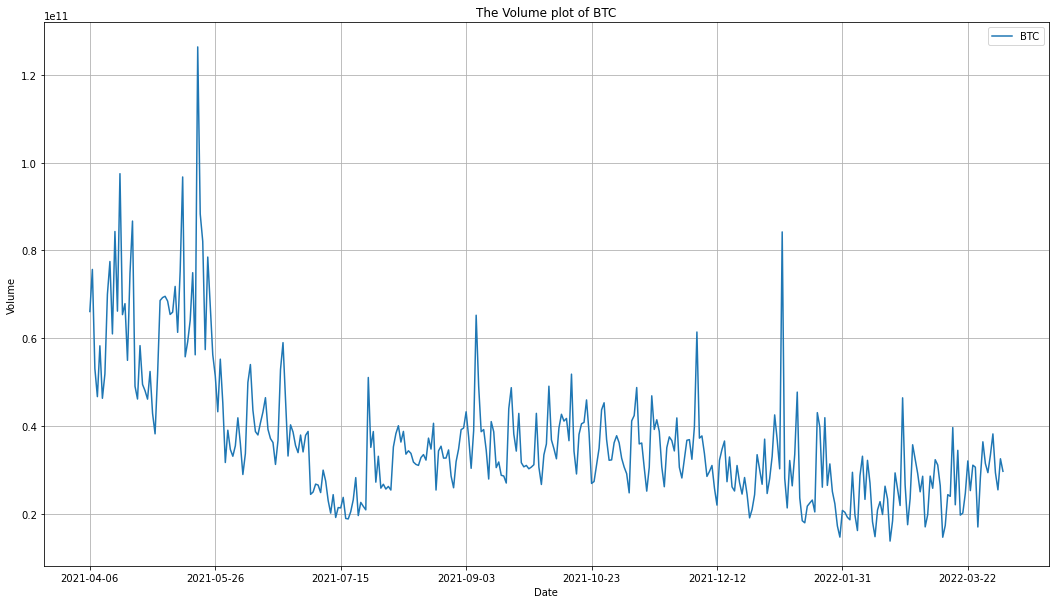

In [23]:
invest_data(connection, 'BTC', 'Volume')

**Explanation of `BTC Volume` plot**

This line plot of the `BTC` `Volume` data shows the relationship between the *date* from 6th April 2021 to 5th April 2022 (using the date_list variable which is extracted through the Databse is SQL) and the *Volume* in one of the most important asstes of my portfolio. There looks to be a negative correlation between the two variables: as the date increases, the volume in the Dollar price decreses. After about `2021-04`, there was a sudden spike in the prices, which factually makes sense as there was a rise in the BTC price and Volume because of the policy of Tesla accepting BTC as their payment method. We also see a spike around `2022-01`. There is a fall in the Volume around `2021-12`. Noticing these patterns can be extremely beneficial to predict the prices for the coming year or to see the patterns in the currency's nature. Overall we could conclude that our independent variable, date, negatively correlates with our dependent variable, volume, for most of the time in the year therefore that as dates increases, volume dcreases.

---

Let's now switch to a stock. Now we would try and analyze the price of the stock. This is extremely simple because of the above function where I can just change the asset and the data I want to extract the plot for. 

<AxesSubplot:title={'center':'The Open plot of MSFT'}, xlabel='Date', ylabel='Open'>

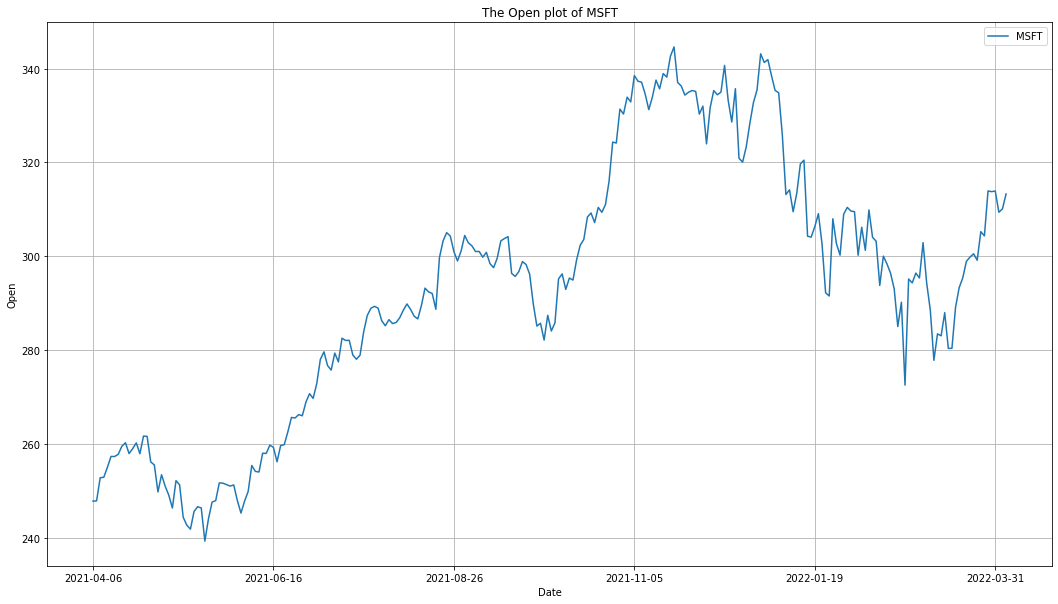

In [24]:
invest_data(connection, 'MSFT', 'Open')

**Explanation of `MSFT Open` price plot**

This line plot of the `MSFT` `Open` price data shows the relationship between the *date* from 6th April 2021 to 5th April 2022 (using the date_list variable which is extracted through the Databse is SQL) and the *Open* price. There looks to be a (mostly) positive correlation between the two variables: as the date increases, the Open Price in the Dollar price decreases. This is true only till the begaining of 2022 becuase after the corelation changes and we see a fall in the prices. Microsoft is a diversified and resilient business protected by strong barriers to entry. The company is well positioned and poised for growth over the coming years. Such high-quality business should be a core holding for long-term becuase the stock prices can still go up becuase from the above pattern we see that the company perforns the best after the first quater and stays on the top till the end of the third quater. Overall we could conclude that our independent variable, date, positively correlates with our dependent variable, volume, for most of the time in the year therefore that as dates increases, volume also increases.


Just like that we can choose any number of data from any of our assets for or analysis.

---

In [25]:
def invest_data_two_assets(connection, asset1, asset2, data, chart_type):
    
    """
    Inputs : 
    asset1     : First Table name.
    asset2     : Second Table name.
    data       : Information you need.
    chart_type : The way you want your plot to look.
    
    Plots the assets' data with date on the x-axis.
    
    Return Value : Plot
    """
    
    # Query for gathering information
    query_template = """
    SELECT Date, {data} 
    FROM {asset1}
    """
    query = query_template.format(data = data, asset1 = asset1)   # Takes the variables from the function and extratcs the data from SQL
    temp_df1 = pd.read_sql_query(query, con=connection)           # Stores the SQL result in DataFrame
    
    # Query for gathering information
    query_template = """
    SELECT Date, {data} 
    FROM {asset2}
    """
    query = query_template.format(data = data, asset2 = asset2)   # Takes the variables from the function and extratcs the data from SQL
    temp_df2 = pd.read_sql_query(query, con=connection)           # Stores the SQL result in DataFrame
    
    temp_df1.set_index('Date', inplace = True) # Making the Date as Index
    temp_df2.set_index('Date', inplace = True) # Making the Date as Index
    
    date_list = list(temp_df1.index)           # Gathering the date as a list for plotting
    date_list.reverse()                        # Making the dates in ascending order
    
    asset_data1 = list(temp_df1.loc[:,data])   # Gathering the asset data as a list for plotting
    asset_data1.reverse()                      # Making the asset data in ascending order
    asset_data2 = list(temp_df2.loc[:,data])   # Gathering the asset data as a list for plotting
    asset_data2.reverse()                      # Making the asset data in ascending order
    
    d = {asset1 : asset_data1, asset2 : asset_data2}     # Making a new df for making a plot with pandas
    df = pd.DataFrame(d, index=date_list)
    
    p_title = 'The ' + data + ' plot of ' + asset1 + ' and ' + asset2    # Making the title
    
    # Creating the plot and giving choice for chart_type
    if chart_type == 'line' or chart_type == 'Line':
        ax = df.plot.line(stacked=False, figsize = (18, 10), title = p_title, grid = True, xlabel = 'Date', ylabel = data)
    elif chart_type == 'area' or chart_type == 'Area':
        ax = df.plot.area(stacked=False, figsize = (18, 10), title = p_title, grid = True, xlabel = 'Date', ylabel = data)
    elif chart_type == 'bar' or chart_type == 'Bar':
        ax = df.plot.bar(stacked=False, figsize = (18, 10), title = p_title, grid = True, xlabel = 'Date', ylabel = data)
    elif chart_type == 'hist' or chart_type == 'Hist':
        ax = df.plot.hist(stacked=False, figsize = (18, 10), title = p_title, grid = True, xlabel = 'Date', ylabel = data)
    elif chart_type == 'kde' or chart_type == 'Kde':
        ax = df.plot.kde(stacked=False, figsize = (18, 10), title = p_title, grid = True, xlabel = 'Date', ylabel = data)
    
    return ax

The above function will help achieve any data from any of the two tables from our data base and compare them as per the desired plot. It asks for four variables, asset1 and asset1, the assets thatt you wish to compare (example: btc and eth), and data is the columns inside the table (example: High/Volume) on which you want to compare the two assets. Inputing the desired variables, we will obtain a plot of that data for one year on a plot of given type in chart_type. This is handy for a one on one comparision between two different assests and for immidiate information that can be helpful in further analysis. Below are some demonstrated examples and why the graph can be useful. 

---
---

<AxesSubplot:title={'center':'The Volume plot of BTC and ETH'}, xlabel='Date', ylabel='Volume'>

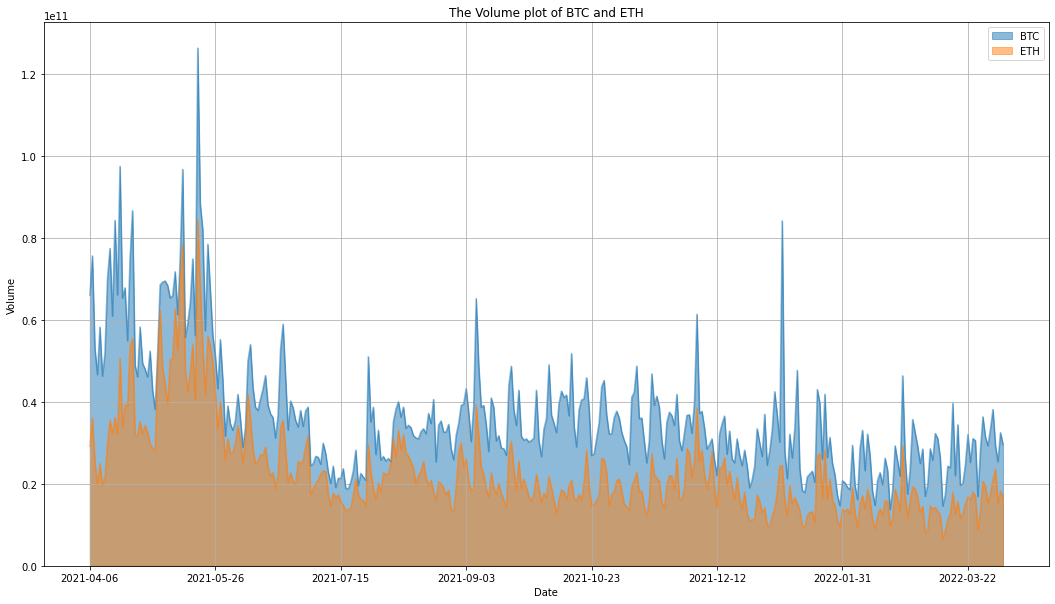

In [26]:
invest_data_two_assets(connection, 'BTC', 'ETH', 'Volume', 'Area')

**Explanation of `Volume` plot comparision between `BTC` and `ETH`**

This area plot of the `Volume` of the `BTC` and `ETH` shows the relationship between the *date* from 6th April 2021 to 5th April 2022 (using the date_list variable which is extracted through the Databse is SQL) and the *Volume* among the two highest volume cryptocurrencies. There looks to be a strong correlation between the two assets: as the BTC's Volume increases, the volume of ETH also increases. This is a good significance that both of these cryptos move together. If the overall volume of the market is up, it will mostly because of these two cryptos as they cover the maximum of volume in cryptos and a strong corelation among these two give it more power. Overall we could conclude that our independent variable, date, is not a factor that affetcs the volume but the corelation between these two cryptos is extremely storng.

---

In [27]:
# Preparation for corelation

temp_df = pd.DataFrame()
temp_df['btc'] = btc['Volume']
temp_df['eth'] = eth['Volume']
cor = temp_df.pct_change()
cor.head()

,btc,eth
0,NaN,NaN
1,0.096462,0.091626
2,-0.218013,-0.157944
3,0.154330,0.537228
4,0.300855,-0.109817


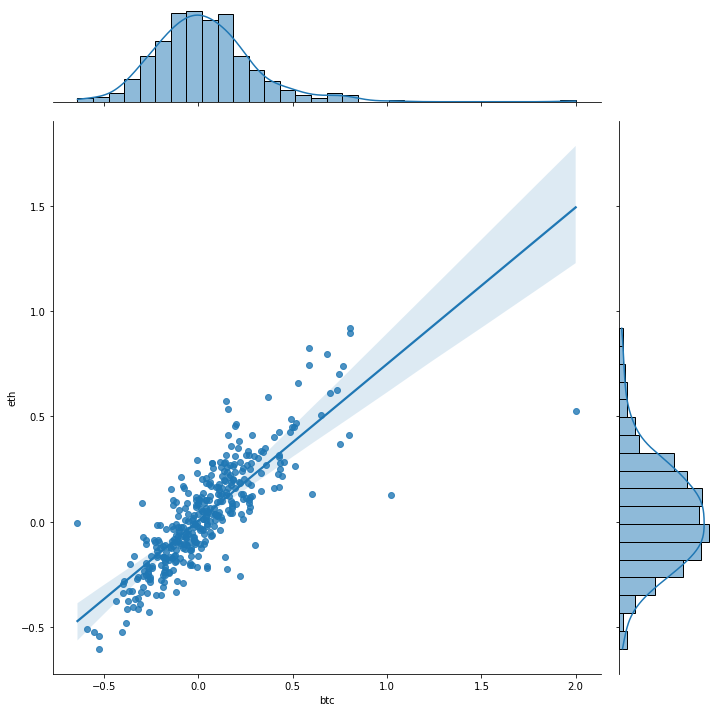

In [28]:
# PLotting the corelation
sns.jointplot(data=cor, x='btc', y="eth", kind='reg',height=10)

Even the above regretion test shows how highly these two cryptos are related because of the cluster of these points in the above scatterplot and the straight line with just a few outliers.

<AxesSubplot:title={'center':'The High plot of MSFT and FB'}, xlabel='Date', ylabel='High'>

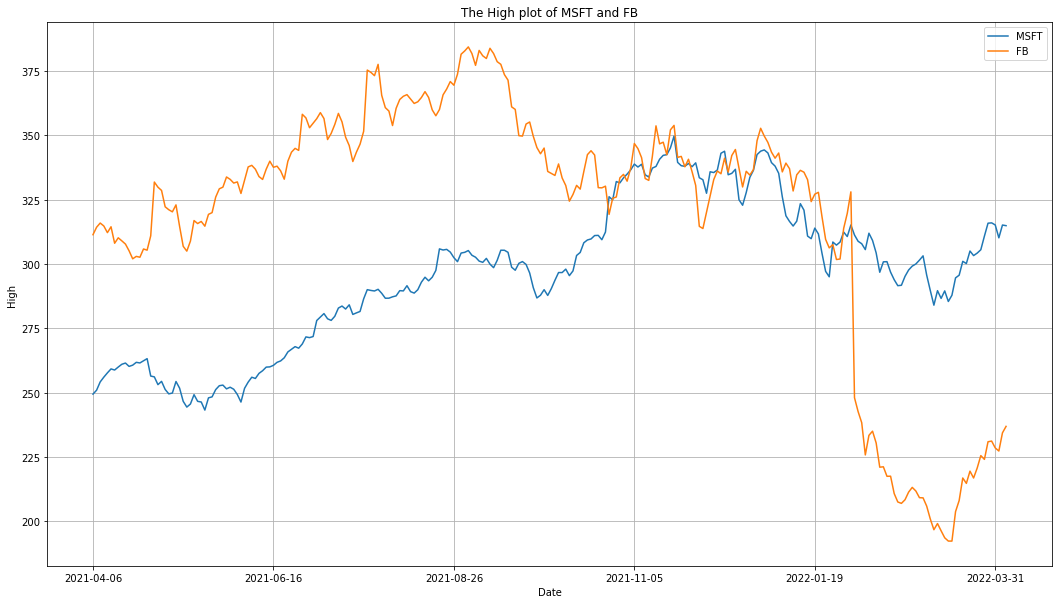

In [29]:
invest_data_two_assets(connection, 'MSFT', 'FB', 'High', 'line')

Just like that we can choose any data from any of our two assets for or analysis.

---
---

In [30]:
# Combining tables via SQL

query  = """
SELECT *, 'BTC' as Asset FROM btc 
    UNION 
SELECT *, 'ETH' as Asset FROM eth
    UNION
SELECT *, 'MSFT' as Asset FROM msft
    UNION
SELECT *, 'FB' as Asset FROM fb
    
ORDER BY Date, Asset
"""

k = pd.read_sql_query(query, con=connection)
k.set_index(['Date', 'Asset'], inplace = True) 
k.sort_values(['Date', 'Asset'], inplace = True, ascending = [False, True])

k.head(4)

Open      High       Low        Volume
Date       Asset                                            
2022-04-05 BTC    46624.51  47106.14  45544.81  2.964060e+10
           ETH     3521.24   3546.71   3410.55  1.668150e+10
           FB       234.08    236.86    231.02  2.972710e+07
           MSFT     313.27    314.86    309.87  2.298000e+07

In [31]:
def combined_cryptos():
    
    """
    Inputs :  None
    
    Combines the cryptos' data. BTC and ETH combined in a single DataFrame
    
    Return Value : DataFrame
    """
    
    btc['Asset'] = 'BTC'
    eth['Asset'] = 'ETH'
    
    cryptos = pd.concat([btc, eth])
    
    return cryptos

cryptos = combined_cryptos()
cryptos.head()

,Date,Open,High,Low,Volume,Asset
0,2022-04-05,46624.51,47106.14,45544.81,2.964060e+10,BTC
1,2022-04-04,46445.27,46791.09,45235.82,3.249979e+10,BTC
2,2022-04-03,45859.13,47313.48,45634.10,2.541440e+10,BTC
3,2022-04-02,46285.50,47028.28,45782.51,2.933659e+10,BTC
4,2022-04-01,45554.16,46616.24,44403.14,3.816264e+10,BTC


In [32]:
def combined_stocks():
    
    """
    Inputs :  None
    
    Combines the stocks' data. MSFT and FB combined in a single DataFrame
    
    Return Value : DataFrame
    """
    
    msft['Asset'] = 'MSFT'
    fb['Asset'] = 'FB'
    
    stocks = pd.concat([msft, fb])
    
    return stocks

stocks = combined_stocks()
stocks.head()

,Date,Open,High,Low,Volume,Asset
1,2022-04-05,313.27,314.86,309.87,22980000.0,MSFT
2,2022-04-04,310.09,315.11,309.71,24190000.0,MSFT
3,2022-04-01,309.37,310.13,305.54,27110000.0,MSFT
4,2022-03-31,313.90,315.14,307.89,33310000.0,MSFT
5,2022-03-30,313.76,315.95,311.58,25240000.0,MSFT


In [33]:
def combined_all():
    
    """
    Inputs :  None
    
    Combines the stocks and cryptos data. BTC, ETH, MSFT and FB combined in a single DataFrame
    
    Return Value : DataFrame
    """
    
    btc['Asset'] = 'BTC'
    eth['Asset'] = 'ETH'
    msft['Asset'] = 'MSFT'
    fb['Asset'] = 'FB'
    
    combined_all = pd.concat([btc, eth, msft, fb])
    
    return combined_all

combined = combined_all()
combined.tail()

,Date,Open,High,Low,Volume,Asset
250,2021-04-12,311.05,312.15,307.93,10881900.0,FB
251,2021-04-09,311.40,314.74,310.33,15988500.0,FB
252,2021-04-08,314.85,315.88,310.05,20894100.0,FB
253,2021-04-07,306.34,314.25,305.50,22855200.0,FB
254,2021-04-06,308.84,311.35,305.25,17335200.0,FB


In [34]:
# Creating the cryptos table in SQL
statement = """
CREATE TABLE IF NOT EXISTS cryptos (
    Date DATE NOT NULL,
    Asset VARCHAR(4) NOT NULL,
    Open DECIMAL(7,2) NOT NULL,
    High DECIMAL(7,2) NOT NULL,
    Low DECIMAL(7,2) NOT NULL,
    Volume DECIMAL(13,2) NOT NULL,
    PRIMARY KEY (Date, Asset)
)
"""

# Execute the statement
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of cryptos failed:", str(err))

In [35]:
# Inserting values in cryptos using variable binding in SQL table
stmt = """
    INSERT INTO cryptos
    VALUES (:Date, :Asset, :Open, :High, :Low, :Volume)
"""
prepare_insert = sa.sql.text(stmt)

# Iterate through the rows in the DataFrame
for rowlabel, rowseries in cryptos.iterrows():
    # Bind variables (match :x in statement)
    bound_insert = prepare_insert.bindparams(**rowseries) # some fancy Python

    # Execute
    rp = connection.execute(bound_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: cryptos.Date, cryptos.Asset
[SQL: 
    INSERT INTO cryptos
    VALUES (?, ?, ?, ?, ?, ?)
]
[parameters: ('2022-04-05', 'BTC', 46624.51, 47106.14, 45544.81, 29640604055.0)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

---

In [36]:
# Creating the stocks table in SQL
statement = """
CREATE TABLE IF NOT EXISTS stocks (
    Date DATE NOT NULL,
    Asset VARCHAR(4) NOT NULL,
    Open DECIMAL(7,2) NOT NULL,
    High DECIMAL(7,2) NOT NULL,
    Low DECIMAL(7,2) NOT NULL,
    Volume DECIMAL(13,2) NOT NULL,
    PRIMARY KEY (Date, Asset)
)
"""

# Execute the statement
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of stocks failed:", str(err))

In [37]:
# Inserting values in stocks using variable binding in SQL table
stmt = """
    INSERT INTO stocks
    VALUES (:Date, :Asset, :Open, :High, :Low, :Volume)
"""
prepare_insert = sa.sql.text(stmt)

# Iterate through the rows in the DataFrame
for rowlabel, rowseries in cryptos.iterrows():
    # Bind variables (match :x in statement)
    bound_insert = prepare_insert.bindparams(**rowseries) # some fancy Python

    # Execute
    rp = connection.execute(bound_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: stocks.Date, stocks.Asset
[SQL: 
    INSERT INTO stocks
    VALUES (?, ?, ?, ?, ?, ?)
]
[parameters: ('2022-04-05', 'BTC', 46624.51, 47106.14, 45544.81, 29640604055.0)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

---

In [38]:
# Creating the combined table in SQL
statement = """
CREATE TABLE IF NOT EXISTS combined (
    Date DATE NOT NULL,
    Asset VARCHAR(4) NOT NULL,
    Open DECIMAL(7,2) NOT NULL,
    High DECIMAL(7,2) NOT NULL,
    Low DECIMAL(7,2) NOT NULL,
    Volume DECIMAL(13,2) NOT NULL,
    PRIMARY KEY (Date, Asset)
)
"""

# Execute the statement
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of combined failed:", str(err))

In [39]:
# Inserting values in combined using variable binding in SQL table
stmt = """
    INSERT INTO combined
    VALUES (:Date, :Asset, :Open, :High, :Low, :Volume)
"""
prepare_insert = sa.sql.text(stmt)

# Iterate through the rows in the DataFrame
for rowlabel, rowseries in combined.iterrows():
    # Bind variables (match :x in statement)
    bound_insert = prepare_insert.bindparams(**rowseries) # some fancy Python

    # Execute
    rp = connection.execute(bound_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: combined.Date, combined.Asset
[SQL: 
    INSERT INTO combined
    VALUES (?, ?, ?, ?, ?, ?)
]
[parameters: ('2022-04-05', 'BTC', 46624.51, 47106.14, 45544.81, 29640604055.0)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

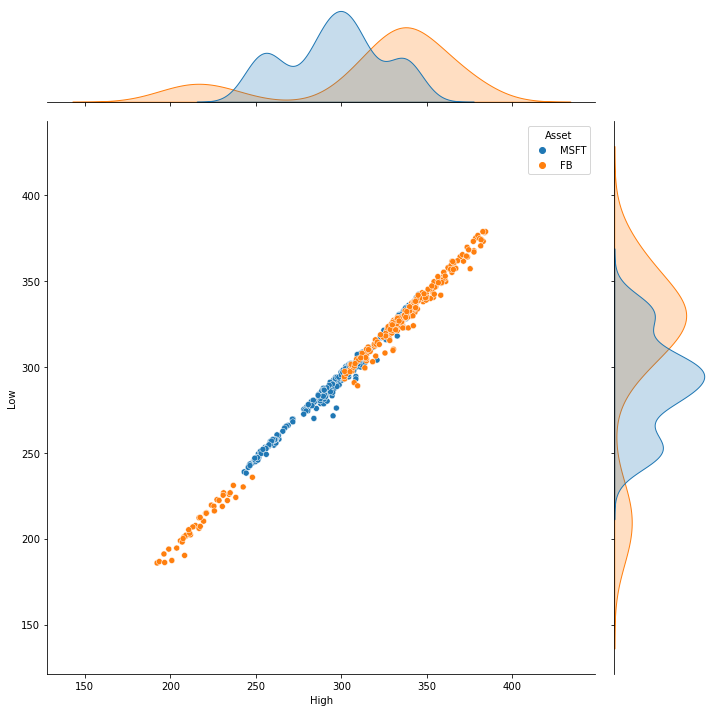

In [40]:
stocks = stocks.set_index(['Date', 'Asset'])
sns.jointplot(data=stocks, x="High", y="Low", hue="Asset", height = 10)

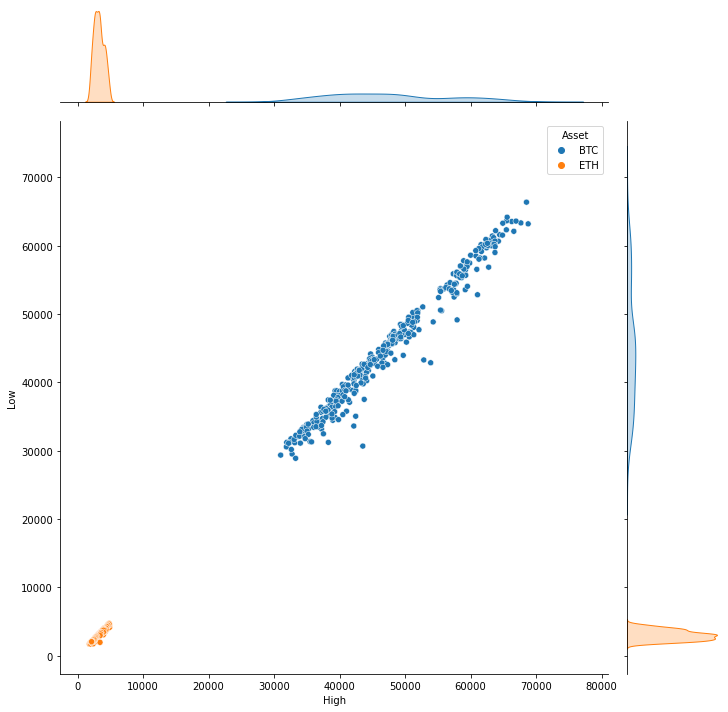

In [41]:
cryptos = cryptos.set_index(['Date', 'Asset'])
sns.jointplot(data=cryptos, x="High", y="Low", hue="Asset", height = 10)

In [42]:
# Displaying a peek of the combined Table in SQL

query  = """
SELECT *
FROM combined
ORDER BY Date, Asset
"""
combinedDF = pd.read_sql_query(query, con=connection)
combinedDF.set_index(['Date', 'Asset'], inplace = True) # Setting index so that we can see the data according to date and asset
combinedDF.sort_values(['Date', 'Asset'], inplace = True, ascending = [False, True]) # Sorting the values of Date as Descending and Asset as ascending
combinedDF.head(14)

Open      High       Low        Volume
Date       Asset                                            
2022-04-05 BTC    46624.51  47106.14  45544.81  2.964060e+10
           ETH     3521.24   3546.71   3410.55  1.668150e+10
           FB       234.08    236.86    231.02  2.972710e+07
           MSFT     313.27    314.86    309.87  2.298000e+07
2022-04-04 BTC    46445.27  46791.09  45235.82  3.249979e+10
           ETH     3522.36   3535.15   3422.00  1.820997e+10
           FB       225.98    234.35    225.86  2.810080e+07
           MSFT     310.09    315.11    309.71  2.419000e+07
2022-04-03 BTC    45859.13  47313.48  45634.10  2.541440e+10
           ETH     3444.81   3573.96   3421.26  1.533381e+10
2022-04-02 BTC    46285.50  47028.28  45782.51  2.933659e+10
           ETH     3449.79   3521.28   3442.00  2.357156e+10
2022-04-01 BTC    45554.16  46616.24  44403.14  3.816264e+10
           ETH     3282.58   3467.56   3223.89  2.098299e+10

The main goal to show the first 14 values in the above query is to show that there is a difference in the size of the data sets because cryptocurrency is marketable for 365 days wheras stock market has 253 legal days to operate. Weekends and Government holidays are not included for MSFT and FB 

In [43]:
combinedDF.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1238 entries, ('2022-04-05', 'BTC') to ('2021-04-06', 'MSFT')
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1238 non-null   float64
 1   High    1238 non-null   float64
 2   Low     1238 non-null   float64
 3   Volume  1238 non-null   float64
dtypes: float64(4)
memory usage: 53.6+ KB


---

In [44]:
combinedDF_gb = combinedDF.groupby('Asset')
combinedDF_gb.agg({'Open':['mean', 'max', 'min'], 'High':['mean', 'max', 'min'], \
                   'Low':['mean', 'max', 'min'], 'Volume':['mean', 'max', 'min']})

Open                              High                      \
               mean       max       min          mean       max       min   
Asset                                                                       
BTC    46319.591863  67549.74  29796.29  47476.575836  68789.63  31006.19   
ETH     3138.515397   4810.07   1786.28   3242.620904   4891.70   1837.00   
FB       315.246024    381.68    187.03    319.198504    384.33    192.28   
MSFT     293.143937    344.62    239.26    295.766575    349.67    243.19   

                Low                            Volume                \
               mean       max       min          mean           max   
Asset                                                                 
BTC    44957.544137  66382.06  28893.62  3.671193e+10  1.263581e+11   
ETH     3021.030219   4718.04   1707.60  2.280418e+10  8.448291e+10   
FB       311.377835    378.81    185.82  2.286314e+07  1.881199e+08   
MSFT     290.269882    342.20    238.16  2.760150e+07  8.998000e+07   

                     
                min  
Asset                
BTC    1.373656e+10  
ETH    6.532997e+09  
FB     7.175200e+06  
MSFT   1.390000e+07

In [45]:
combinedDF_gb.describe()

Open                                                              \
       count          mean          std       min         25%        50%   
Asset                                                                      
BTC    365.0  46319.591863  9021.811273  29796.29  39098.7000  45554.160   
ETH    365.0   3138.515397   745.837867   1786.28   2555.3000   3095.270   
FB     254.0    315.246024    50.316565    187.03    307.5525    330.135   
MSFT   254.0    293.143937    27.771937    239.26    273.5450    295.365   

                             High                ...         Low            \
             75%       max  count          mean  ...         75%       max   
Asset                                            ...                         
BTC    53252.160  67549.74  365.0  47476.575836  ...  50514.4900  66382.06   
ETH     3747.160   4810.07  365.0   3242.620904  ...   3595.2000   4718.04   
FB       344.400    381.68  254.0    319.198504  ...    341.1550    378.81   
MSFT     309.595    344.62  254.0    295.766575  ...    306.4375    342.20   

      Volume                                                          \
       count          mean           std           min           25%   
Asset                                                                  
BTC    365.0  3.671193e+10  1.540563e+10  1.373656e+10  2.668649e+10   
ETH    365.0  2.280418e+10  1.131734e+10  6.532997e+09  1.595313e+10   
FB     254.0  2.286314e+07  1.704836e+07  7.175200e+06  1.399992e+07   
MSFT   254.0  2.760150e+07  1.044467e+07  1.390000e+07  2.051250e+07   

                                                 
                50%           75%           max  
Asset                                            
BTC    3.338317e+10  4.096994e+10  1.263581e+11  
ETH    1.953090e+10  2.652858e+10  8.448291e+10  
FB     1.767670e+07  2.711132e+07  1.881199e+08  
MSFT   2.529500e+07  3.224750e+07  8.998000e+07  

[4 rows x 32 columns]

**The above DataFrame shows us all the statistically significant measures for the assets.**

---

# Intorduction of NFT

Let's try something interesting, to make my DB design clean and tidy, I will introduce a data set representing Sales of Non-fungible token (NFT). I have no experience with NFTs, and this is why I had a quick thought of comparing the volume of BTC and ETH on each day and the sales of NFTs to compare to see if NFTs also have a strong corelation with the Volume of BTC and ETH. As we concluded with the above graph, ETH is highly similr to how BTC is acting. With the same hypothesis in mind, let's see if NFT sales are also dependent on the BTC or ETH's Volume.

In [46]:
# Loading NFT data base
nft_path = os.path.join(datadir, "nft.csv")
nft = pd.read_csv(nft_path)
nft = nft.rename(columns={'DateTime': 'Date', 'Sales USD': 'Volume', 'Number of sales': 'Number_of_Sales' })   # Renaming columns
nft.head()

,Date,Number_of_Sales,Volume
0,2021-04-06,3410790,395875026.1
1,2021-04-07,3416653,398064289.8
2,2021-04-08,3420359,408473950.9
3,2021-04-09,3423636,414554665.3
4,2021-04-10,3426553,418074480.9


In [47]:
# Creating the nft table in SQL
statement = """
CREATE TABLE IF NOT EXISTS nft (
    Date DATE NOT NULL,
    Volume DECIMAL(12,2),
    Number_of_Sales DECIMAL(12,2),
    PRIMARY KEY (Date)
)
"""

# Execute the statement
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of nft failed:", str(err))

In [48]:
# Inserting values in nft using variable binding in SQL table
stmt = """
    INSERT INTO nft
    VALUES (:Date, :Volume, :Number_of_Sales)
"""
prepare_insert = sa.sql.text(stmt)

# Iterate through the rows in the DataFrame
for rowlabel, rowseries in nft.iterrows():
    # Bind variables (match :x in statement)
    bound_insert = prepare_insert.bindparams(**rowseries) # some fancy Python

    # Execute
    rp = connection.execute(bound_insert)

IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: nft.Date
[SQL: 
    INSERT INTO nft
    VALUES (?, ?, ?)
]
[parameters: ('2021-04-06', 395875026.1, 3410790)]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [49]:
# Joining the btc and nft tables for a regression comparision on the volume of btc and sale of nft

query  = """
SELECT nft.Date, nft.Volume as NFT_Volume, btc.Volume as BTC_Volume
FROM nft
INNER JOIN btc ON nft.Date = btc.Date
"""
nft_btc = pd.read_sql_query(query, con=connection)
nft_btc.head()

,Date,NFT_Volume,BTC_Volume
0,2021-04-06,395875026.1,66058027988
1,2021-04-07,398064289.8,75645303584
2,2021-04-08,408473950.9,53053855641
3,2021-04-09,414554665.3,46655208546
4,2021-04-10,418074480.9,58238470525


In [50]:
# Preparation for corelation

temp_df = pd.DataFrame()
temp_df['btc_vol'] = btc['Volume']
temp_df['nft_sales'] = nft['Volume']
cor = temp_df.pct_change()
cor.head()

,btc_vol,nft_sales
0,NaN,NaN
1,0.096462,0.005530
2,-0.218013,0.026151
3,0.154330,0.014886
4,0.300855,0.008491


<AxesSubplot:title={'center':'The Volume plot of BTC and NFT'}, xlabel='Date', ylabel='Volume'>

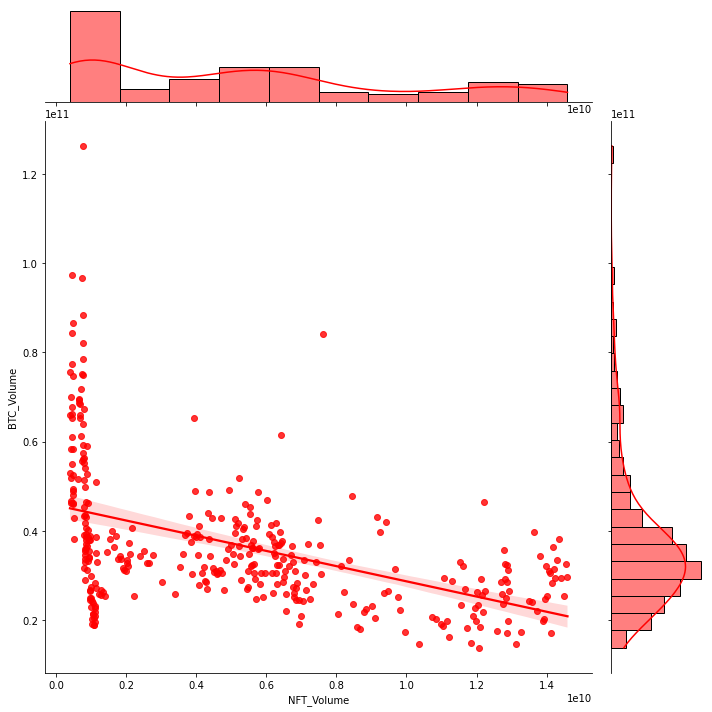

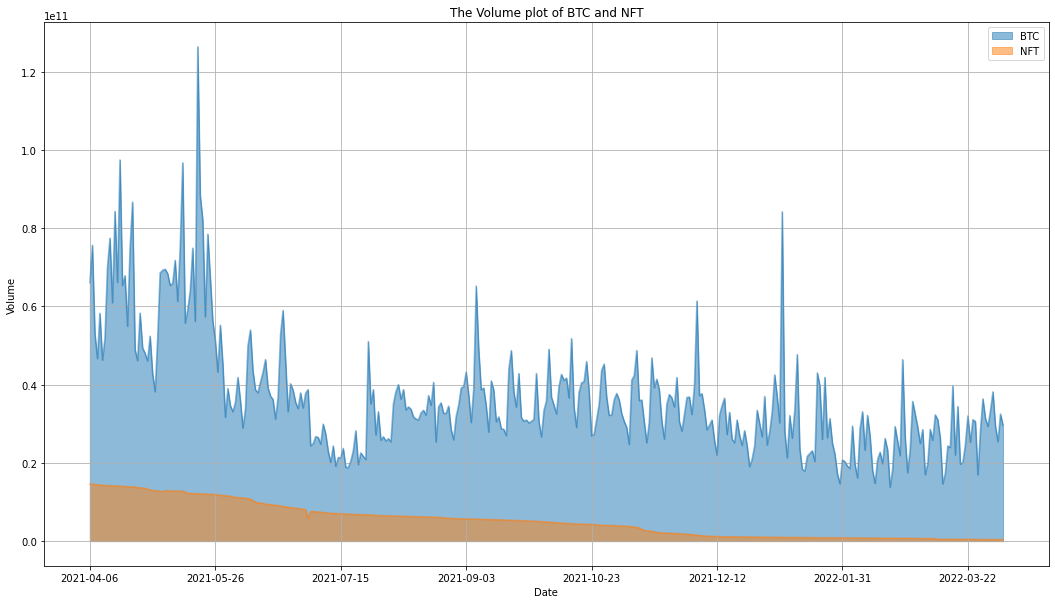

In [51]:
# Regression Plot of NFT and BTC
sns.jointplot(data=nft_btc, x="NFT_Volume", y="BTC_Volume", kind='reg', height = 10, color = 'red')

# Area plot of NFT's sales and BTC's Volume
invest_data_two_assets(connection, 'BTC', 'NFT', 'Volume', 'Area')

**Explanation of Corelation and Regression of NFT and BTC**

This linear regression model looks at the effect NFT Sales in the past year has on BTC's Volume for the sane days. Looking at both the graphs, area and regression, it suggests a negative  relationship: for increase in the volume of BTC's Volume, there is a decrease in the NFT Sale. While this result is statistically significant, I am unsure that it’s practically signficant. For an increase in the Volume of BTC, NFT shoudl not matter as it is on a different blockchain, but it is interesting to see a relationship like that as it can suggest useage of BTC's blockchain for future NFTs. (see the scatter plot with regression line, above).

In [52]:
# Joining the eth and nft tables for a regression comparision on the volume of eth and sale of nft

query  = """
SELECT nft.Date, nft.Volume as NFT_Volume, eth.Volume as ETH_Volume
FROM nft
INNER JOIN eth ON nft.Date = eth.Date
"""
nft_eth = pd.read_sql_query(query, con=connection)
nft_eth.head()

,Date,NFT_Volume,ETH_Volume
0,2021-04-06,395875026.1,29222865881
1,2021-04-07,398064289.8,36116271935
2,2021-04-08,408473950.9,25312956529
3,2021-04-09,414554665.3,19812472092
4,2021-04-10,418074480.9,24986243611


In [53]:
# Preparation for corelation

temp_df = pd.DataFrame()
temp_df['eth_vol'] = eth['Volume']
temp_df['nft_sales'] = nft['Volume']
cor = temp_df.pct_change()
cor.head()

,eth_vol,nft_sales
0,NaN,NaN
1,0.091626,0.005530
2,-0.157944,0.026151
3,0.537228,0.014886
4,-0.109817,0.008491


<AxesSubplot:title={'center':'The Volume plot of ETH and NFT'}, xlabel='Date', ylabel='Volume'>

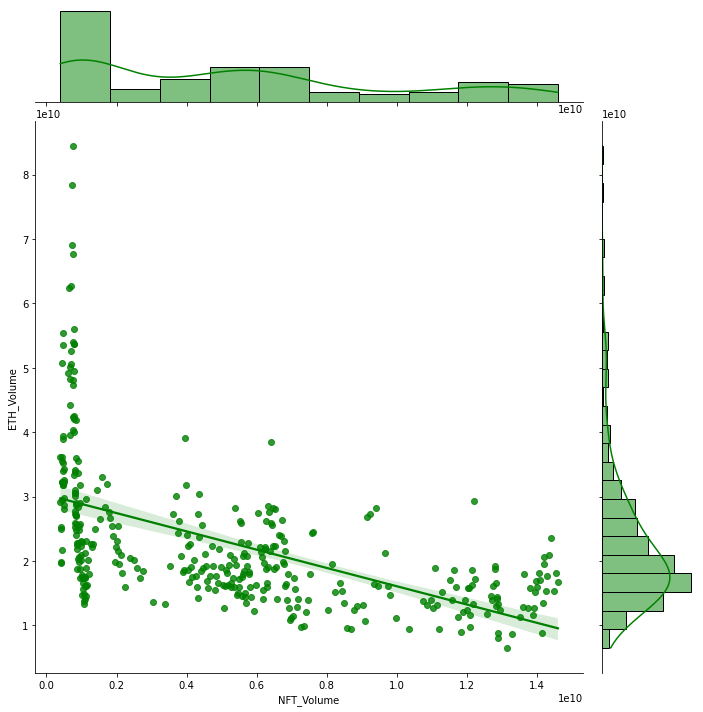

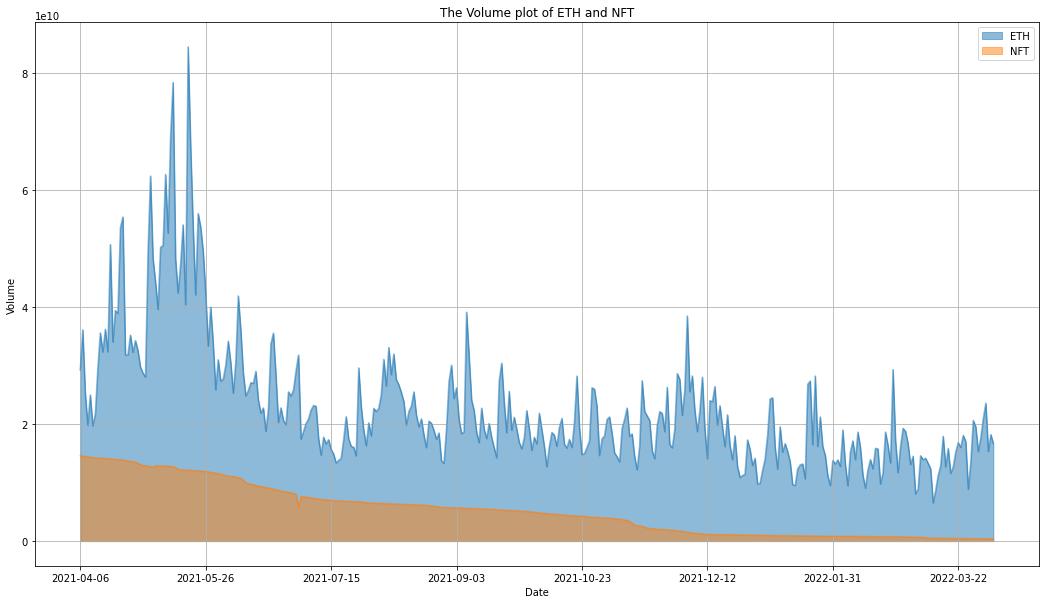

In [54]:
# Regression Plot of NFT and ETH
sns.jointplot(data=nft_eth, x="NFT_Volume", y="ETH_Volume", kind='reg', height = 10, color = 'green')

# Area plot of NFT's sales and BTC's Volume
invest_data_two_assets(connection, 'ETH', 'NFT', 'Volume', 'Area')

**Explanation of Corelation and Regression of NFT and ETH**

This linear regression model looks at the effect NFT Sales in the past year has on ETH's Volume for the sane days. Looking at both the graphs, area and regression, it suggests a negative  relationship: for increase in the volume of ETH's Volume, there is a decrease in the NFT Sale. While this result is statistically significant, I am unsure that it’s practically signficant. For an increase in the Volume of ETH, NFT shoudl not matter as it is on a different blockchain, but it is interesting to see a relationship like that as it can suggest useage of ETH's blockchain for future NFTs. (see the scatter plot with regression line, above).

---

### Data Base Explanation

Adhereing to the TidyData Rules that are

- Each column represents exactly one variable.
- Each row needs to represents a unique mapping of independenr variables to dependent variables. 
- Exactly one table is used for mappings with the same independent variables.

I designed my DataBase. I do not tend to follow the rules in the begaining as working with multilevel indexing could have been challending and this is why I divided my data in various tables, but as the project progresses, I start following the three above mentioned rules. At the very end of the project, I am technically left with 2 tables, `combined and nft`. In the below diagram, I wanna show all the tables I used to give a better clarity, but the tables within the green box are the final two table that my DataBase should consist. 

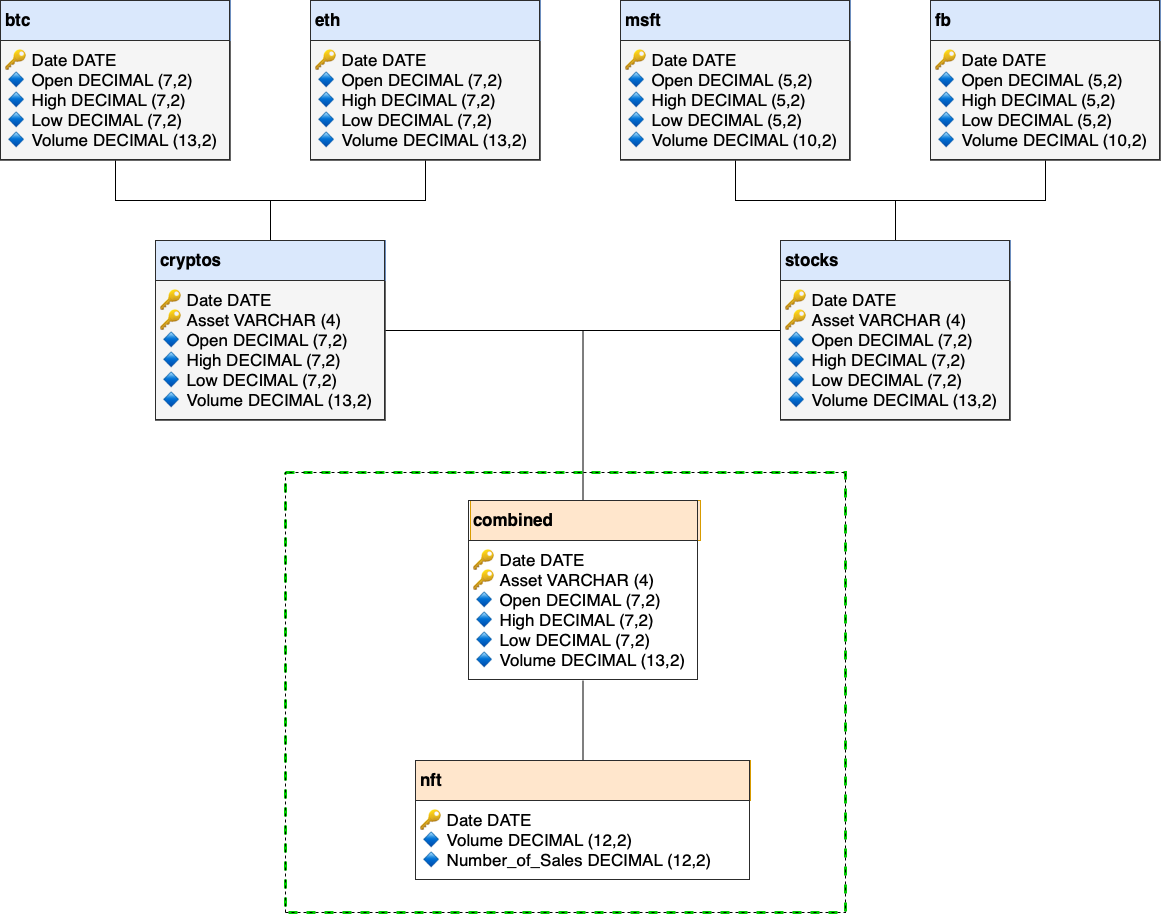

In [56]:
from IPython.display import Image
print()
Image("invest_diagram.png", width=800, height=800)

## The Conclusion

- The graphs of volume in all the assets and the flexibility to change any data option give us a good estimate of how each asset performed in the last year.
- The statistics show the average of Open, Low, High, Volume of each asset. The maximum and minimum of each are also showed. This will give us a good understanding of the coming future of each asset and we can back the prediction with this data. 
- Overall, we see that there is an extrememly strong co-relation in the cryptocurrency that we choose (BTC and ETH). Wheras, there was no significant relation between FB and MSFT. This absolutely makes sense as the two companies are extremely seperate entities but the crypto market is mostly based on BTC.
- NFTs act inversely when compared to Crypto. BTC or ETH increase in Volume negetively affects the sales of NFTs.

---
---
---